## 1. Load data

In [ ]:
import polars as pl
from tqdm import tqdm
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

### 1.2 Load raw data

In [ ]:
import requests

url = "https://lfs.aminer.cn/misc/moocdata/data/mooccube2/entities/problem.json"
problem_df = pl.read_ndjson(url)
problem_df.head()


problem_id,title,content,option,answer,score,type,typetext,location,context_id,exercise_id,language
i64,str,str,struct[4],str,f64,i64,str,str,list[i64],str,str
1730,"""第一课 导论与三家分晋--习题""","""1、《资治通鉴》卷1记载：智宣子将以瑶为后，智果曰：“……瑶…","{""武艺超群，精通射御之术"",""礼贤下士，虚怀若谷"",""反映敏捷，文辞和口才俱佳"",""敢作敢为，处事果断""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1731,"""第一课 导论与三家分晋--习题""","""2、《资治通鉴》是一部____史书。""","{""纪传体"",""编年体"",""纪事本末体"",""国别体""}","""[""B""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1732,"""第一课 导论与三家分晋--习题""","""3、《资治通鉴》原名____，后由____赐名“资治通鉴”。""","{""《通鉴》；宋神宗"",""《通志》；宋徽宗"",""《通鉴》；宋徽宗"",""《通志》；宋神宗""}","""[""D""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1733,"""第一课 导论与三家分晋--习题""","""4、“三家分晋”中“三家”具体指：""","{""魏赵韩"",""魏韩智"",""赵韩智"",""魏赵智""}","""[""A""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""
1734,"""第一课 导论与三家分晋--习题""","""5、智伯联合韩、魏的军队攻打赵氏时，赵襄子选择退守的阵地是：""","{""邯郸"",""长子"",""晋阳"",""皋狼""}","""[""C""]""",1.0,1,"""单选题""","""1.4""","[8045581, 8045582, 8045583]","""Ex_856""","""Chinese"""


In [ ]:
problem_df.shape

(2454422, 12)

## 2. Khám phá dữ liệu

### 2.1 Thống kê mô tả

#### 2.1.1 Sử dụng hàm `shape` để xem kích thước của một DataFrame (số hàng, số cột)

In [ ]:
problem_df.shape

(2454422, 12)

#### 2.1.2 Sử dụng hàm `info()` để cung cấp một bản tóm tắt ngắn gọn của DataFrame (tên cột, kiểu dữ liệu, số lượng giá trị không bị thiếu)

In [ ]:
pandas_df = problem_df.to_pandas()
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454422 entries, 0 to 2454421
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   problem_id   int64  
 1   title        object 
 2   content      object 
 3   option       object 
 4   answer       object 
 5   score        float64
 6   type         int64  
 7   typetext     object 
 8   location     object 
 9   context_id   object 
 10  exercise_id  object 
 11  language     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 224.7+ MB


#### 2.1.3 Kiểm tra giá tị categorical của các trường trong file

In [ ]:
# Hàm kiểm tra trường field_name có bao nhiêu giá trị phân biệt
def check_value_counts(df_to_check, field_name):
  print(df_to_check[field_name].value_counts())

In [ ]:
# Kiểm tra trường typetext có bao nhiêu giá trị categorical -> 5
check_value_counts(problem_df, 'typetext')

shape: (7, 2)
┌──────────┬─────────┐
│ typetext ┆ count   │
│ ---      ┆ ---     │
│ str      ┆ u32     │
╞══════════╪═════════╡
│ 填空题   ┆ 112871  │
│ 多选题   ┆ 373565  │
│ 编程题   ┆ 281     │
│ 判断题   ┆ 505433  │
│ 单选题   ┆ 1421954 │
│ 主观题   ┆ 37449   │
│ 投票题   ┆ 2869    │
└──────────┴─────────┘


In [ ]:
# Kiểm tra trường type có bao nhiêu giá trị categorical -> 6
check_value_counts(problem_df, 'type')

shape: (7, 2)
┌──────┬─────────┐
│ type ┆ count   │
│ ---  ┆ ---     │
│ i64  ┆ u32     │
╞══════╪═════════╡
│ 5    ┆ 37409   │
│ 9    ┆ 281     │
│ 3    ┆ 2869    │
│ 6    ┆ 506384  │
│ 2    ┆ 373580  │
│ 4    ┆ 111956  │
│ 1    ┆ 1421943 │
└──────┴─────────┘


In [ ]:
# Kiểm tra trường title có bao nhiêu giá trị categorical
check_value_counts(problem_df, 'title')

shape: (33_871, 2)
┌─────────────────────────────────┬───────┐
│ title                           ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ 二、细菌学总论--9细菌的人工培养 ┆ 2     │
│ 第0章 场的概念--第0章习题       ┆ 306   │
│ Unit 8 8.2 Test                 ┆ 210   │
│ 4.2.2 学习作业                  ┆ 60    │
│ 第五章  项目成本控制--成本分析  ┆ 25    │
│ 法：基本方法——作业              ┆       │
│ …                               ┆ …     │
│ 第四讲 习题2                    ┆ 10    │
│ Unit 2 The People in Your Life… ┆ 10    │
│ 第6章 多媒体技术及图像处理--6.5 ┆ 6     │
│ 图像扫描技术、6.6…              ┆       │
│ 第一单元 装备--单元测试         ┆ 90    │
│ 第十章 北欧两项--项目介绍       ┆ 20    │
└─────────────────────────────────┴───────┘


In [ ]:
# Kiểm tra trường score có bao nhiêu giá trị categorical -> 7
check_value_counts(problem_df, 'score')

shape: (49, 2)
┌───────┬───────┐
│ score ┆ count │
│ ---   ┆ ---   │
│ f64   ┆ u32   │
╞═══════╪═══════╡
│ 5.5   ┆ 15    │
│ 5.0   ┆ 27567 │
│ 60.0  ┆ 20    │
│ 33.0  ┆ 20    │
│ 50.0  ┆ 138   │
│ …     ┆ …     │
│ 6.0   ┆ 2705  │
│ 70.0  ┆ 3     │
│ 15.0  ┆ 681   │
│ 35.0  ┆ 74    │
│ 8.0   ┆ 2106  │
└───────┴───────┘


In [ ]:
# Kiểm tra trường location có bao nhiêu giá trị categorical
check_value_counts(problem_df, 'location')

shape: (2_778, 2)
┌──────────┬───────┐
│ location ┆ count │
│ ---      ┆ ---   │
│ str      ┆ u32   │
╞══════════╪═══════╡
│ 57.3     ┆ 12    │
│ 3.28     ┆ 497   │
│ 1.14.1   ┆ 337   │
│ 8.2.2    ┆ 693   │
│ 13.1.2   ┆ 209   │
│ …        ┆ …     │
│ 8.17     ┆ 694   │
│ 4.4.3    ┆ 200   │
│ 42.1     ┆ 35    │
│ 9.35     ┆ 4     │
│ 35.12    ┆ 2     │
└──────────┴───────┘


In [ ]:
# Kiểm tra trường excercise_id có bao nhiêu giá trị categorical
check_value_counts(problem_df, 'exercise_id')

shape: (358_267, 2)
┌─────────────┬───────┐
│ exercise_id ┆ count │
│ ---         ┆ ---   │
│ str         ┆ u32   │
╞═════════════╪═══════╡
│ Ex_569858   ┆ 7     │
│ Ex_6142022  ┆ 8     │
│ Ex_1254008  ┆ 8     │
│ Ex_1788790  ┆ 6     │
│ Ex_7476815  ┆ 9     │
│ …           ┆ …     │
│ Ex_5227579  ┆ 2     │
│ Ex_6715683  ┆ 10    │
│ Ex_7314207  ┆ 3     │
│ Ex_7850661  ┆ 50    │
│ Ex_8040696  ┆ 5     │
└─────────────┴───────┘


In [ ]:
# Kiểm tra trường language có bao nhiêu giá trị categorical
check_value_counts(problem_df, 'language')

shape: (2, 2)
┌──────────┬─────────┐
│ language ┆ count   │
│ ---      ┆ ---     │
│ str      ┆ u32     │
╞══════════╪═════════╡
│ English  ┆ 244317  │
│ Chinese  ┆ 2210105 │
└──────────┴─────────┘


In [ ]:
check_value_counts(problem_df, 'score')

shape: (49, 2)
┌───────┬───────┐
│ score ┆ count │
│ ---   ┆ ---   │
│ f64   ┆ u32   │
╞═══════╪═══════╡
│ 7.0   ┆ 839   │
│ 0.0   ┆ 1796  │
│ 5.5   ┆ 15    │
│ 4.5   ┆ 23    │
│ 17.0  ┆ 55    │
│ …     ┆ …     │
│ 0.5   ┆ 10034 │
│ 80.0  ┆ 4     │
│ 6.0   ┆ 2705  │
│ 9.0   ┆ 371   │
│ 40.0  ┆ 39    │
└───────┴───────┘


#### 2.1.4 Dùng hàm `isnull()` để kiểm tra giá trị null ở mỗi cột

In [ ]:
problem_df = problem_df.to_pandas()
problem_df.isnull().sum()

,0
problem_id,0
title,0
content,0
option,149564
answer,0
score,574372
type,0
typetext,0
location,0
context_id,0


Nhận xét:
* Các trường `type`, `typetext`, `title`, `language` là dữ liệu dạng CATEGORICAL (dạng phân loại và không thể sắp xếp được).
* Trong trường `type` có 6 loại nhưng trường `typetext` lại có 5 loại.


#### 2.1.5 Tính toán các thống kê cơ bản cho các trường có thể tính toán được (dữ liệu dạng số), gồm có `type`, `problem_id`, `score`, `location` nhưng chỉ xét trường `score` vì các trường kia thuộc kiểu định danh.
* Sử dụng hàm `describe()` để cung cấp một cái nhìn tổng quan về các đặc tính thống kê của các cột của DataFrame
* Sử dụng các hàm của `numpy` để kiểm tra so với hàm `describe()`

In [ ]:
# Hàm describe()
problem_df.describe()

,problem_id,score,type
count,2.454422e+06,1.880050e+06,2.454422e+06
mean,4.378630e+06,1.509275e+00,2.384843e+00
std,2.741835e+06,2.006904e+00,2.014618e+00
min,1.730000e+03,0.000000e+00,1.000000e+00
25%,1.755411e+06,1.000000e+00,1.000000e+00
50%,3.713372e+06,1.000000e+00,1.000000e+00
75%,7.164337e+06,1.000000e+00,4.000000e+00
max,8.431753e+06,1.000000e+02,9.000000e+00


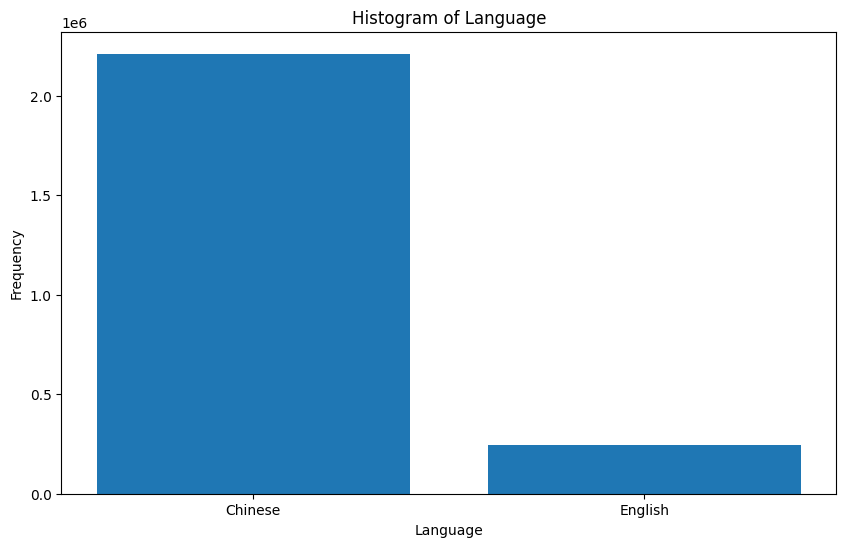

In [ ]:
# Biểu đồ cho language
plt.figure(figsize=(10, 6))
language_counts = problem_df['language'].value_counts()

plt.bar(language_counts.index, language_counts.values)
plt.title('Histogram of Language')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

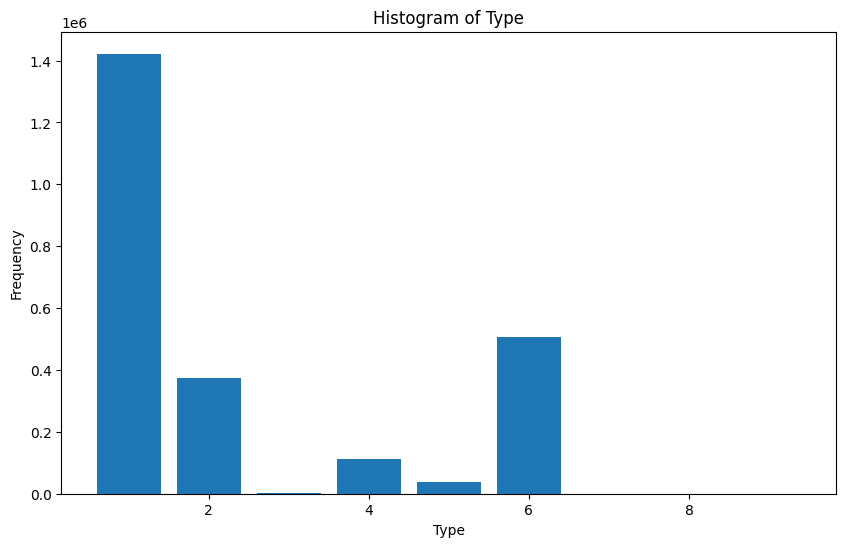

In [ ]:
# Biểu đồ cho type
plt.figure(figsize=(10, 6))
type_counts = problem_df['type'].value_counts()

plt.bar(type_counts.index, type_counts.values)
plt.title('Histogram of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

shape: (7, 2)
┌──────────┬─────────┐
│ typetext ┆ count   │
│ ---      ┆ ---     │
│ str      ┆ u32     │
╞══════════╪═════════╡
│ 主观题   ┆ 37449   │
│ 投票题   ┆ 2869    │
│ 多选题   ┆ 373565  │
│ 填空题   ┆ 112871  │
│ 单选题   ┆ 1421954 │
│ 判断题   ┆ 505433  │
│ 编程题   ┆ 281     │
└──────────┴─────────┘


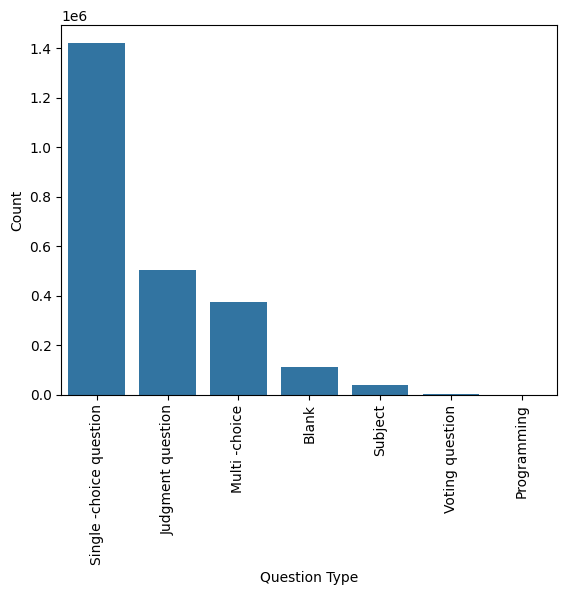

In [ ]:
# Thống kê số lượng typetext
typetext_counts = problem_df['typetext'].value_counts()

# In ra kết quả
print(typetext_counts)
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

# Data
typetext_trans = ['单选题', '判断题', '多选题', '填空题', '主观题', '投票题', '编程题']
counts = [1421954, 505433, 373565, 112871, 37449, 2869, 281]

# Initialize translator
translator = Translator()

# Translate the Chinese labels into English
translated_values = [translator.translate(value, src='zh-CN', dest='en').text for value in typetext_trans]

# Create a DataFrame for plotting (if needed for seaborn)
import pandas as pd
data = pd.DataFrame({'Question Type': typetext_trans, 'Count': counts})

# Plot the countplot with the translated values as x-ticks
sns.barplot(x='Question Type', y='Count', data=data)

# Replace Chinese labels with translated values
plt.xticks(ticks=range(len(translated_values)), labels=translated_values, rotation=90)

# Show plot
plt.show()


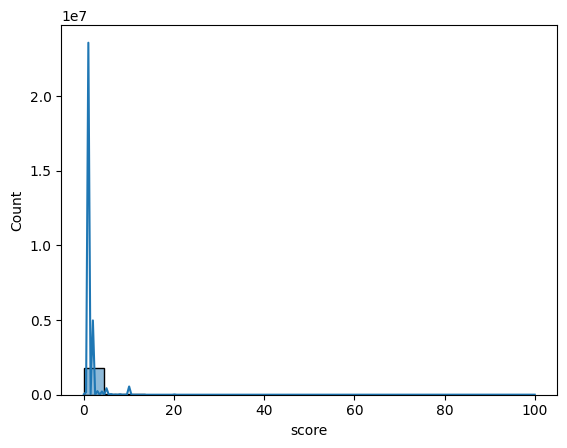

In [ ]:
sns.histplot(data=problem_df, x='score', kde='true')
plt.show()

In [ ]:
!pip install statsmodels
import polars as pl
import pandas as pd

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
columns = ['location','language','type','typetext']
F_stat = []
p_value = []
for c in columns:
    model = ols(f'score ~ {c}', data=problem).fit()

    anova_table = sm.stats.anova_lm(model, typ=2)

    F_stat.append(anova_table['F'][0])
    p_value.append(anova_table['PR(>F)'][0])
pd.DataFrame({'Column':columns,'F statistic': F_stat,'P_value': p_value})

C:\Users\TechCare\AppData\Local\Temp\ipykernel_13152\3907031005.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F_stat.append(anova_table['F'][0])
C:\Users\TechCare\AppData\Local\Temp\ipykernel_13152\3907031005.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value.append(anova_table['PR(>F)'][0])
C:\Users\TechCare\AppData\Local\Temp\ipykernel_13152\3907031005.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F_stat.ap

,Column,F statistic,P_value
0,location,3.200268,1.752335e-20
1,language,637.642475,3.144870e-140
2,type,38667.160640,0.000000e+00
3,typetext,38667.160640,0.000000e+00


## 3. Làm sạch dữ liệu

### 3.1 Xử lý dữ liệu trùng lặp

In [ ]:
problem_df_pandas = problem_df.to_pandas()

# Now, you can work with the Pandas DataFrame
# Check for duplicates based on "problem_id"
problem_df_duplicated = problem_df_pandas.duplicated(subset=["problem_id"])

# Print the result
print(problem_df_duplicated)

0          False
1          False
2          False
3          False
4          False
           ...  
2454417    False
2454418    False
2454419    False
2454420    False
2454421    False
Length: 2454422, dtype: bool


In [ ]:
problem_df_duplicated.sum()

0

Nhận xét:
* File problem_df không có giá trị trùng lặp vì câu lệnh `problem_df_duplicated.sum()` cho ra kết quả bằng 0.
